<a href="https://colab.research.google.com/github/ramakane/covid-19-analysis/blob/main/World_Population_wrt_covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Goal of this project 



1.   Find the portion of people affceted by covid-19 (in percentage)
2.   Analyse graphs of various countries



1.Finding percentage of people affceted by covid=19

In [ ]:
#Downloading population data
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"helloworlditsme","key":"3c17d519f627c69978df0dbd921a1d64"}'}

In [ ]:
#Authenticating 
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#downloading dataset for polpulation of the world
!kaggle datasets download -d tanuprabhu/population-by-country-2020

  0% 0.00/7.57k [00:00<?, ?B/s]
100% 7.57k/7.57k [00:00<00:00, 16.2MB/s]


In [ ]:
#Unzipping data file
from zipfile import ZipFile
file_name= "population-by-country-2020.zip"

with ZipFile(file_name,'r') as zip:
  print('Extracting Now.........................')
  zip.extractall()
  print('Done')

Extracting Now.........................
Done


In [ ]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#Exploring population data
df_world_pop = pd.read_csv('/content/population_by_country_2020.csv')

In [ ]:
df_world_pop.shape

(235, 11)

In [ ]:
df_world_pop.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [ ]:
#Calculating total world population
world_pop=df_world_pop['Population (2020)'].sum(axis=0)
world_pop

7808449406

In [ ]:
#Sorting data in alphabetical order
df_world_pop.sort_values(by='Country (or dependency)',ascending=True,inplace=True)

In [ ]:
df_world_pop[df_world_pop['Country (or dependency)'] == 'United States']

In [ ]:
df_world_pop.drop(df_world_pop.iloc[:, 2:], axis = 1, inplace = True) 

In [ ]:
#df_world_pop.drop(df_world_pop.iloc[:, :1], axis = 1, inplace = True)

In [ ]:
df_world_pop.head()

,Country (or dependency),Population (2020)
36,Afghanistan,39074280
139,Albania,2877239
32,Algeria,43984569
209,American Samoa,55169
202,Andorra,77287


In [ ]:
#download covid-19 data
!git clone https://github.com/CSSEGISandData/COVID-19.git


Cloning into 'COVID-19'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 58468 (delta 0), reused 2 (delta 0), pack-reused 58462
Receiving objects: 100% (58468/58468), 497.30 MiB | 20.06 MiB/s, done.
Resolving deltas: 100% (37053/37053), done.
Checking out files: 100% (688/688), done.


In [ ]:
#Exploring covid-19 data
conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
conf_df = pd.read_csv(conf_csv)
grouped_conf_df = conf_df.groupby(by = ['Country/Region'], as_index = False).sum()

In [ ]:
grouped_conf_df.shape
conf_df.shape

(267, 274)

In [ ]:
last = conf_df[conf_df.columns[len(conf_df.columns)-1]]

In [ ]:
type(last)

pandas.core.series.Series

In [ ]:
conf_df.drop(conf_df.iloc[:, 4:], axis = 1, inplace = True) 

In [ ]:
conf_df.head()

,Province/State,Country/Region,Lat,Long
0,NaN,Afghanistan,33.93911,67.709953
1,NaN,Albania,41.15330,20.168300
2,NaN,Algeria,28.03390,1.659600
3,NaN,Andorra,42.50630,1.521800
4,NaN,Angola,-11.20270,17.873900


In [ ]:
conf_df['last'] = last

In [ ]:
conf_df[conf_df['Country/Region']=='US']

,Province/State,Country/Region,Lat,Long,last
243,NaN,US,40.0,-100.0,8106384


In [ ]:
conf_df.loc[242,'Country/Region'] = 'United States'

In [ ]:
# Merging the two dataframes 
final_df = pd.merge(left=conf_df, right=df_world_pop, left_on='Country/Region', right_on='Country (or dependency)')
final_df.head()

,Province/State,Country/Region,Lat,Long,last,Country (or dependency),Population (2020)
0,NaN,Afghanistan,33.93911,67.709953,40141,Afghanistan,39074280
1,NaN,Albania,41.15330,20.168300,16774,Albania,2877239
2,NaN,Algeria,28.03390,1.659600,54203,Algeria,43984569
3,NaN,Andorra,42.50630,1.521800,3377,Andorra,77287
4,NaN,Angola,-11.20270,17.873900,7462,Angola,33032075


In [ ]:
final_df.shape

(252, 7)

In [ ]:
#final_df.drop(final_df.iloc[:,7: 9], axis = 1, inplace = True) 

In [ ]:
final_df.head()

,Province/State,Country/Region,Lat,Long,last,Country (or dependency),Population (2020)
0,NaN,Afghanistan,33.93911,67.709953,40141,Afghanistan,39074280
1,NaN,Albania,41.15330,20.168300,16774,Albania,2877239
2,NaN,Algeria,28.03390,1.659600,54203,Algeria,43984569
3,NaN,Andorra,42.50630,1.521800,3377,Andorra,77287
4,NaN,Angola,-11.20270,17.873900,7462,Angola,33032075


In [ ]:
#Dropping unecessary columns 
#final_df.drop(final_df.iloc[:,9:], axis = 1, inplace = False) 

In [ ]:
# Grouping same country regions as one country
grouped_final_df = final_df.groupby(by = ['Country/Region'], as_index = False).sum()

In [ ]:
grouped_final_df.shape

(174, 5)

In [ ]:
grouped_final_df.rename(columns = {'last':'Covid-19 Cases'}, inplace = True) 

In [ ]:
grouped_final_df.head()

,Country/Region,Lat,Long,Covid-19 Cases,Population (2020)
0,Afghanistan,33.93911,67.709953,40141,39074280
1,Albania,41.15330,20.168300,16774,2877239
2,Algeria,28.03390,1.659600,54203,43984569
3,Andorra,42.50630,1.521800,3377,77287
4,Angola,-11.20270,17.873900,7462,33032075


In [ ]:
# Calculating the percentage
percentage = grouped_final_df['Covid-19 Cases'] / grouped_final_df['Population (2020)'] 

In [ ]:
percentage = percentage * 100

In [ ]:
percentage

0      0.102730
1      0.582989
2      0.123232
3      4.369428
4      0.022590
         ...   
169    0.001155
170    0.001667
171    0.006865
172    0.085493
173    0.054430
Length: 174, dtype: float64

In [ ]:
# Adding last column as percentage
grouped_final_df['Percentage'] = percentage

In [ ]:
grouped_final_df[grouped_final_df["Country/Region"] == 'India' ]

,Country/Region,Lat,Long,Covid-19 Cases,Population (2020),Percentage
73,India,20.593684,78.96288,7494551,1382345085,0.542162


In [ ]:
                             
#grouped_final_df.set_index(["Percentage"], inplace = True, append = True, drop = True) 
                             
#grouped_final_df.reset_index(level = 1, inplace =False, col_level = 1) 

In [ ]:
grouped_final_df[grouped_final_df["Country/Region"] == 'United States' ]

,Country/Region,Lat,Long,Covid-19 Cases,Population (2020),Percentage
165,United States,38.9637,35.2433,345678,331341050,0.104327


In [ ]:
# Sorting according to the Percentage
per1 = grouped_final_df.sort_values(by='Percentage',ascending=False,inplace=False)

In [ ]:
per1.head()

,Country/Region,Lat,Long,Covid-19 Cases,Population (2020),Percentage
12,Bahrain,26.027500,50.550000,77571,1711057,4.533513
129,Qatar,25.354800,51.183900,129227,2889284,4.472631
3,Andorra,42.506300,1.521800,3377,77287,4.369428
78,Israel,31.046051,34.851612,302770,8678517,3.488730
69,Holy See,41.902900,12.453400,27,801,3.370787


In [ ]:
# Calculating total cases of covid-19 all over the world
world_covid=per1['Covid-19 Cases'].sum(axis=0)
world_covid

31233312

In [ ]:
# Calculating percentage of people affcted by covid-19
world_percent = (world_covid/world_pop)*100
world_percent

0.3999937807882878

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


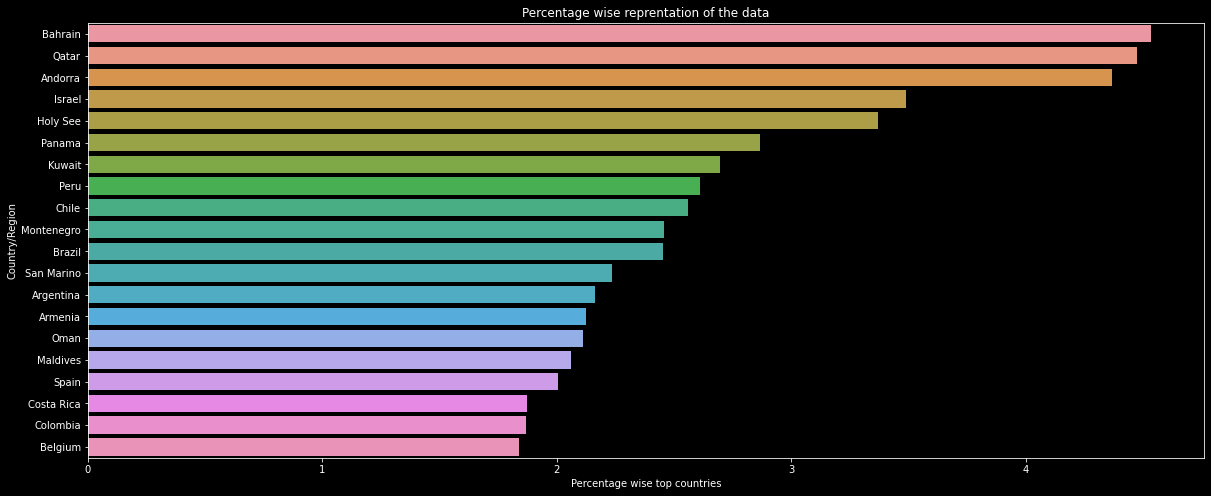

In [ ]:
 # Plotting  bar graph 
 plt.figure(figsize = (20,8))
 plt.title("Percentage wise reprentation of the data")
sns.barplot(per1['Percentage'].head(20), per1['Country/Region'].head(20), orient = 'h')
plt.xlabel('Percentage wise top countries')
plt.show()

In [ ]:
#Exploring the deaths data
death_df=pd.read_csv('/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
death_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444,1445,1446,1451,1451,1453,1453,1455,1458,1458,1458,1458,1462,1462,1466,1467,1469,1470,1472,1473,1477,1479,1480,1481,1481,1485,1488
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,321,322,324,327,330,334,338,340,343,347,353,358,362,364,367,370,370,373,375,377,380,384,387,388,389,392,396,400,403,407,411,413,416,420,424,429,434,439,443,448
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1571,1581,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679,1689,1698,1703,1707,1711,1714,1719,1726,1736,1741,1749,1756,1760,1768,1768,1771,1783,1789,1795,1801,1809,1818,1827,1827,1841,1846
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,54,55,55,55,57,57,59,59,59,59
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,124,126,130,131,132,134,136,139,143,144,147,147,152,154,155,159,162,167,171,174,176,179,183,185,189,193,195,199,211,211,208,212,218,218,219,222,227,228,234,241


In [ ]:
world_covid_death=death_df['8/21/20'].sum(axis=0)
world_covid_death

799224

In [ ]:
#People died because of covid-19
world_percent_death = (world_covid_death/world_pop)*100
world_percent_death

0.010235373996095531

2.   Analyse graphs of various countries

In [ ]:
conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
conf_df = pd.read_csv(conf_csv)
def get_total_confirmed_cases_for_country(country_name):
    total_cases_country = conf_df[conf_df['Country/Region'] == country_name].iloc[:, 4:].apply(sum, axis = 0)
    total_cases_country.index = pd.to_datetime(total_cases_country.index)
    return total_cases_country
def get_total_confirmed_global_cases():
    global_cases = conf_df.iloc[:, 4:].apply(sum, axis=0)
    global_cases.index = pd.to_datetime(global_cases.index)
    return global_cases

In [ ]:
def line_plot(plot_background, fig_width, fig_height, country_name, colour, linewidth, markertype):
    dt_series = None
    if country_name != 'global':
        dt_series = get_total_confirmed_cases_for_country(country_name)
    else:
        dt_series = get_total_confirmed_global_cases()
    plt.style.use(plot_background)
    plt.figure(figsize = (fig_width, fig_height))
    plt.title(f'{country_name.upper()}: Total Coronavirus Cases Reported', fontsize = 16)
    plt.plot(dt_series.index, dt_series, c = colour, lw = linewidth, marker = markertype, markersize = 7)
    plt.xticks(rotation = 45)
    plt.ylabel("Total Cases")
    plt.grid(linestyle='--', c='grey')
    plt.show()

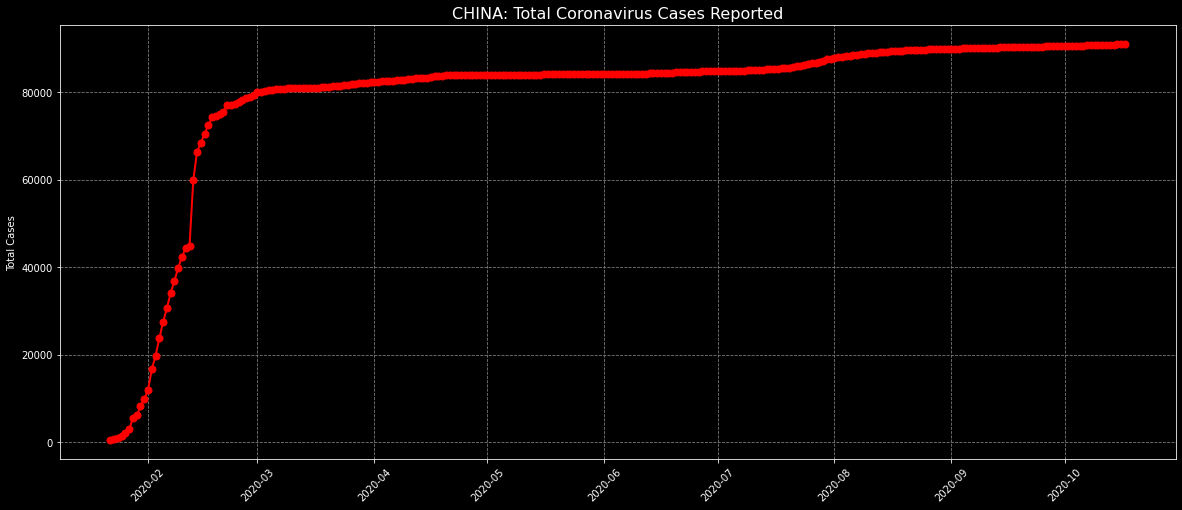

In [ ]:
# Give any country name 

line_plot('dark_background',20,8,'China','red',2,'o')

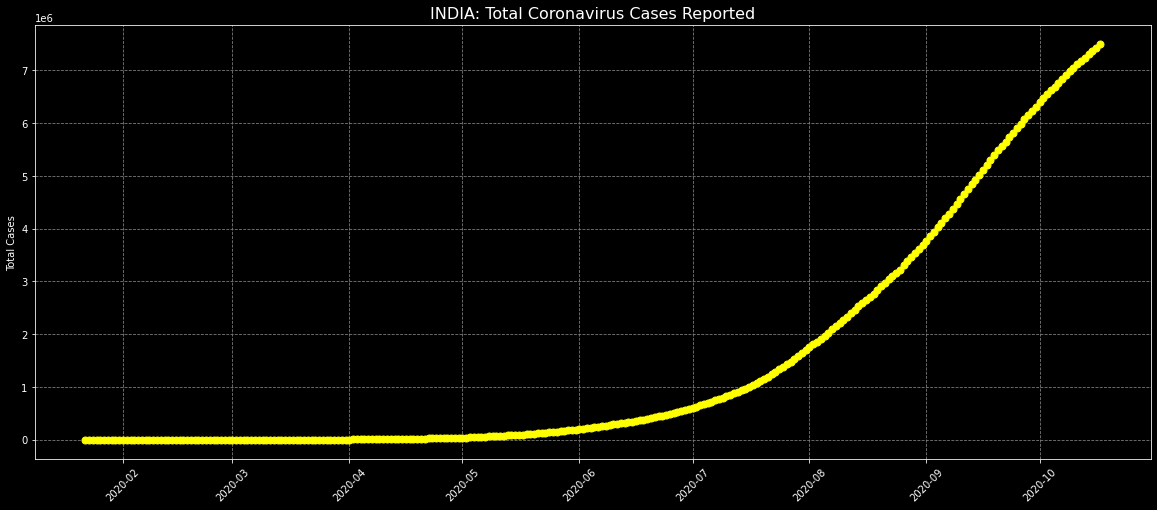

In [ ]:
line_plot('dark_background',20,8,'India','yellow',2,'o')

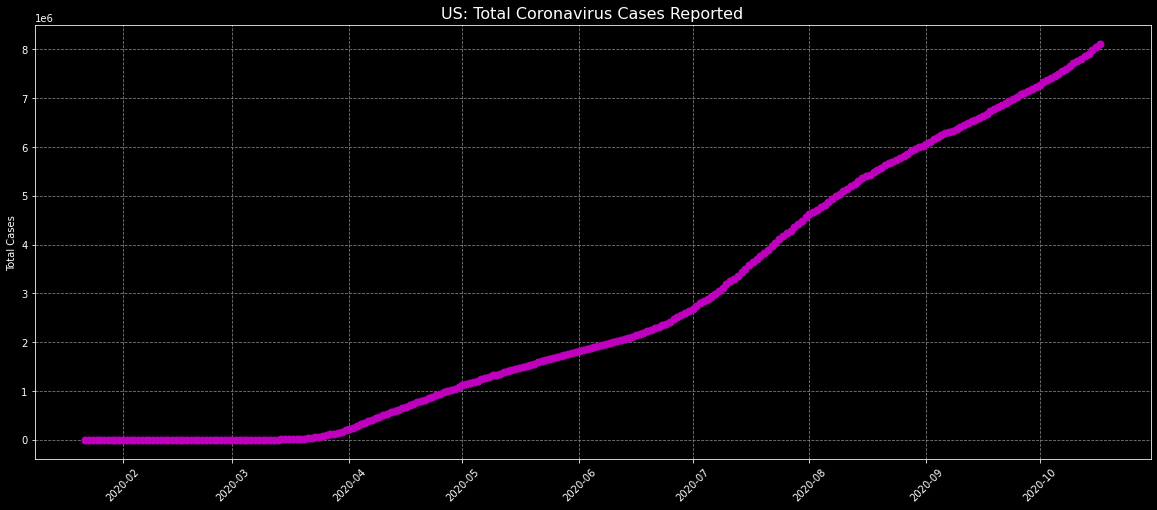

In [ ]:
line_plot('dark_background',20,8,'US','m',2,'o')

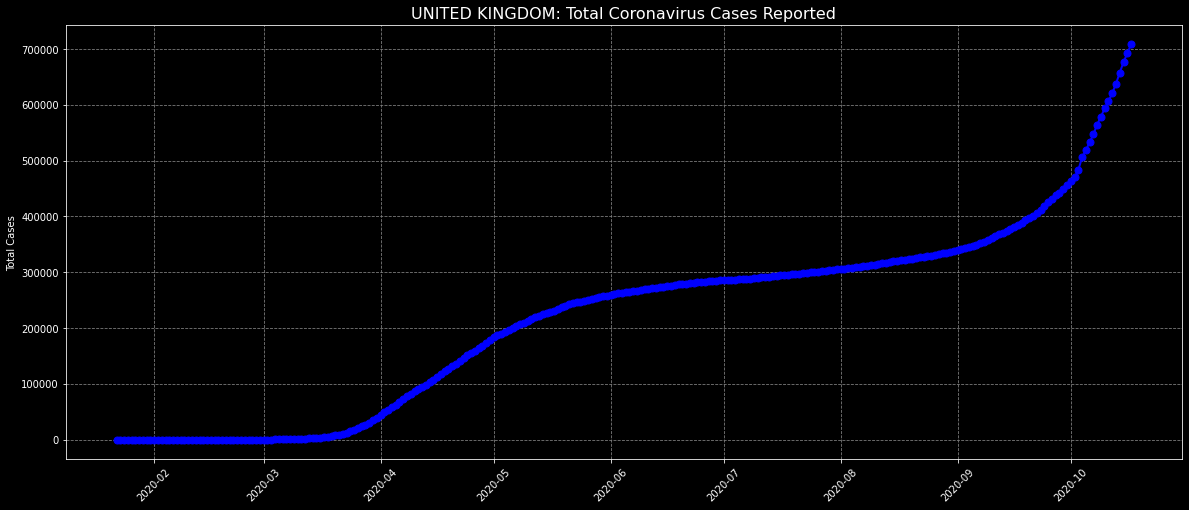

In [ ]:
line_plot('dark_background',20,8,'United Kingdom','b',2,'o')